In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
%matplotlib inline


In [2]:
gainedXP = "Task XP";
dateCompleted = "Date completed"
userID = "UserID"
completionID = "CompletionID"
likes = "Likes"
taskID = "TaskID"
gainedXP = "TaskXP"
my_completed_tasks_dic = [completionID, userID, dateCompleted, likes, taskID, gainedXP]
df_completed_tasks = pd.DataFrame(np.array([
    [9955, 333, '9/22/2020', 33, 1222, 20],
    [9912, 111, '10/12/2020', 9, 1222, 15],
    [9913, 222, '10/15/2020', 10, 1332, 38],
    [9914, 111, '10/19/2020', 14, 1441, 21],
    [9915, 111, '10/25/2020', 18, 1332, 24],
    [9917, 111, '11/11/2020', 20, 1221, 18],
    [9916, 444, '11/15/2020', 50, 1333, 30],
    [9901, 333, '8/22/2020', 30, 1332, 38],
    [9921, 111, '11/1/2020', 14, 1441, 21],
    [9922, 111, '11/26/2020', 18, 1332, 24],
    [9925, 111, '11/22/2020', 19, 1221, 18],
    [9911, 111, '10/7/2020', 14, 1119, 30],
    [9933, 111, '11/8/2020', 18, 1234, 30],
    [9965, 111, '11/30/2020', 20, 1221, 40],
    
]), columns=my_completed_tasks_dic)
df_completed_tasks[taskID] = df_completed_tasks[taskID].astype(int)
df_completed_tasks.head(20)

,CompletionID,UserID,Date completed,Likes,TaskID,TaskXP
0,9955,333,9/22/2020,33,1222,20
1,9912,111,10/12/2020,9,1222,15
2,9913,222,10/15/2020,10,1332,38
3,9914,111,10/19/2020,14,1441,21
4,9915,111,10/25/2020,18,1332,24
5,9917,111,11/11/2020,20,1221,18
6,9916,444,11/15/2020,50,1333,30
7,9901,333,8/22/2020,30,1332,38
8,9921,111,11/1/2020,14,1441,21
9,9922,111,11/26/2020,18,1332,24


In [3]:
taskID = "TaskID"
taskName = "Task Name"
taskXP = "Task Prints"
isMultiplier = "Multiple Points" # 1 for yes; 0 for no

tasks_table_dict = [taskID, taskName, taskXP, isMultiplier]

df_tasks_table = pd.DataFrame(np.array([
    [1332, "Buying Electric Car", 30, 1],
    [1441, "Shopping at Farmer's Market", 15, 1],
    [1442, "Bringing reusable shopping tote", 10, 0],
    [1443, "Took Bart to Work", 15, 0],
    [1119, "Weekly Gardening", 30, 0],
    [1234, "Saved Utility Bill", 10, 1]
]), columns=tasks_table_dict)

df_tasks_table.head(20)

,TaskID,Task Name,Task Prints,Multiple Points
0,1332,Buying Electric Car,30,1
1,1441,Shopping at Farmer's Market,15,1
2,1442,Bringing reusable shopping tote,10,0
3,1443,Took Bart to Work,15,0
4,1119,Weekly Gardening,30,0
5,1234,Saved Utility Bill,10,1


In [4]:
userID = "UserID"
userName = "Name"
userPrints = "Total PRINTS"
userLevel = "Level"

user_table_dict = [userID, userName, userPrints, userLevel]

df_users = pd.DataFrame(np.array([
    [444, "Mike", 180, 5],
    [222, "Jose", 133, 3],
    [333, "Nina", 389, 9],
    [111, "Lisa", 512, 15]
]), columns=user_table_dict)

df_users.head()

,UserID,Name,Total PRINTS,Level
0,444,Mike,180,5
1,222,Jose,133,3
2,333,Nina,389,9
3,111,Lisa,512,15


In [5]:
today_date = pd.to_datetime("today")
today_date

Timestamp('2020-11-08 04:11:46.428008')

In [6]:
curr_month = today_date.month
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', \
         9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# Create 'Month' column from df_completed_tasks
new_completed_df = df_completed_tasks.copy()
new_completed_df['Month'] = pd.to_datetime(new_completed_df[dateCompleted]).apply(lambda x: x.month)
new_completed_df['Day'] = pd.to_datetime(new_completed_df[dateCompleted]).apply(lambda x: x.day)
new_completed_df = new_completed_df[(new_completed_df['Month'] == curr_month) | (new_completed_df['Month'] == curr_month-1)]
new_completed_df

,CompletionID,UserID,Date completed,Likes,TaskID,TaskXP,Month,Day
1,9912,111,10/12/2020,9,1222,15,10,12
2,9913,222,10/15/2020,10,1332,38,10,15
3,9914,111,10/19/2020,14,1441,21,10,19
4,9915,111,10/25/2020,18,1332,24,10,25
5,9917,111,11/11/2020,20,1221,18,11,11
6,9916,444,11/15/2020,50,1333,30,11,15
8,9921,111,11/1/2020,14,1441,21,11,1
9,9922,111,11/26/2020,18,1332,24,11,26
10,9925,111,11/22/2020,19,1221,18,11,22
11,9911,111,10/7/2020,14,1119,30,10,7


In [7]:
def _(r):
    if r['Month'] == curr_month:
        r['Day'] = r['Day'] + 30
    return r
currUser = 111
recent_two_df = new_completed_df[[userID, gainedXP, 'Month', 'Day']]
recent_two_df = recent_two_df.apply(_, axis=1)
recent_two_df = recent_two_df.sort_values(by=['TaskXP'], ascending=True)
recent_two_df

,UserID,TaskXP,Month,Day
1,111,15,10,12
5,111,18,11,41
10,111,18,11,52
3,111,21,10,19
8,111,21,11,31
4,111,24,10,25
9,111,24,11,56
6,444,30,11,45
11,111,30,10,7
12,111,30,11,38


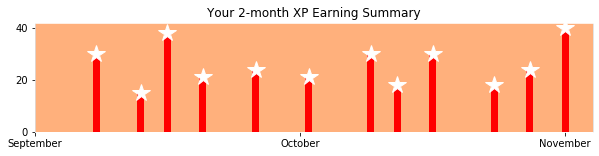

In [9]:
x = recent_two_df['Day']
y = recent_two_df[gainedXP].astype(int)

plt.figure(figsize=(10, 2), edgecolor='r')
plt.bar(x, y, color='r')
plt.plot(x, y, 'w*', markersize=18);

ax = plt.gca()
ax.set_facecolor('xkcd:peach')
ax.spines['bottom'].set_color('#ffffff')
ax.spines['top'].set_color('#ffffff') 
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

plt.xticks([0, 30, 60], [months[(curr_month-2)%12], \
                         months[(curr_month-1)%12], \
                         months[curr_month]])
plt.yticks([0, max(y)//2, max(y)])
plt.title("Your 2-month XP Earning Summary")
plt.show();
